In [1]:
import pandas as pd
from datautil import RULDataset, sys_separation, plot_features
import pickle

### Parameters

In [2]:
data='Rectifier'#'-Rectifier_ripple' #'-Rectifier_Vpp_No_RMS' #'-RectifierDiode_norm2' #''-RectifierDiode_norm3_100' 
Dataset='Rectifier'# 'RectifierRUL'#   f'Capacitor{cap}'# 
Test='_Test' #''# 

## Loading Data

In [3]:
df=pd.read_csv(f'./{data}/{Dataset}{Test}.csv') #without 0s
df_ext=pd.read_csv(f'./{data}/{Dataset}{Test}_ext.csv')  #with 0s
variables=list(df.columns.to_numpy())
variables.pop(-1)
variables.pop(0);

In [4]:
df[['System']+variables+['RUL']]

,System,i1,i2,i3,Load volt,R,L,C01,C02,C03,RUL
0,1,-0.000867,-0.001655,-0.000811,-0.001700,0.834806,0.111657,0.002060,0.002032,0.002062,320.0
1,1,1.381081,1.361819,1.380762,3.909429,0.834806,0.111657,0.002060,0.002032,0.002062,319.0
2,1,0.314989,0.310517,0.314327,4.640103,0.834806,0.111657,0.002060,0.002032,0.002062,318.0
3,1,0.374455,0.369564,0.372190,4.456288,0.834806,0.111657,0.002060,0.002032,0.002062,317.0
4,1,0.480105,0.472272,0.480979,4.199659,0.834806,0.111657,0.002060,0.002032,0.002062,316.0
...,...,...,...,...,...,...,...,...,...,...,...
15992,50,0.973078,0.930245,0.898516,3.093110,1.104497,0.102000,0.001936,0.001853,0.001830,4.0
15993,50,0.972892,0.929964,0.897090,3.090948,1.104497,0.102000,0.001936,0.001853,0.001830,3.0
15994,50,0.972092,0.928834,0.897516,3.089046,1.104497,0.102000,0.001936,0.001853,0.001830,2.0
15995,50,0.972960,0.929179,0.896050,3.092148,1.104497,0.102000,0.001936,0.001853,0.001830,1.0


In [5]:
X=df[variables].to_numpy()
Y=df['RUL'].to_numpy()
sys_data=df['System'].to_numpy()
X.shape

(15997, 9)

# PLot Data

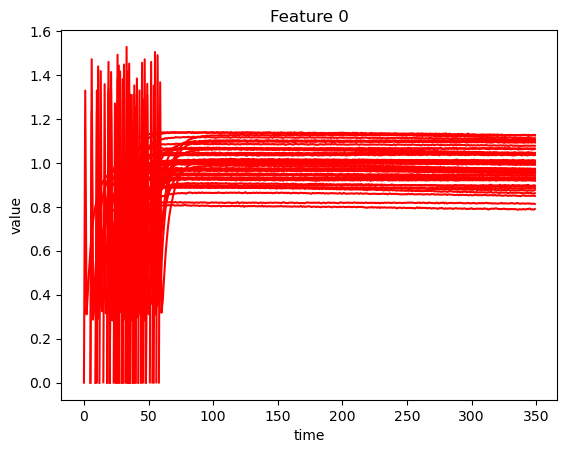

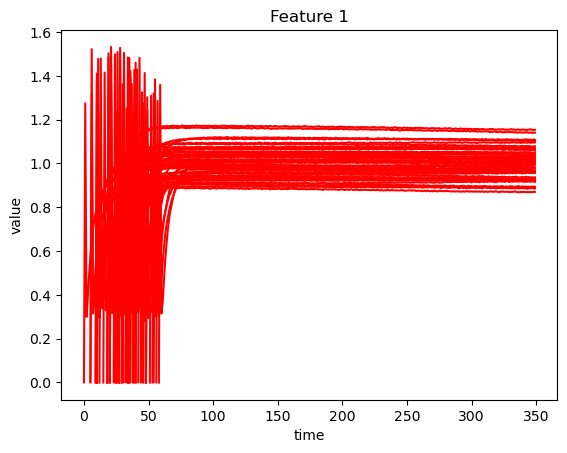

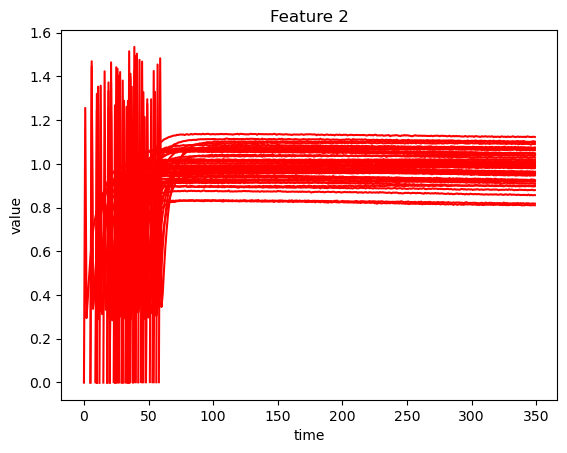

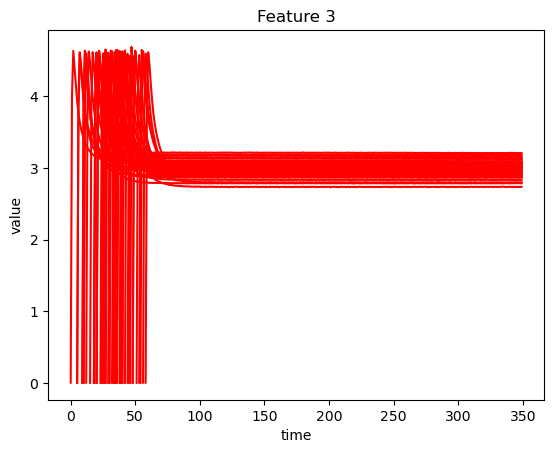

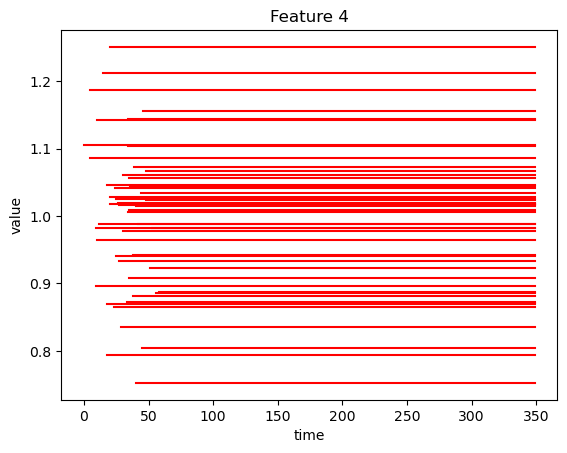

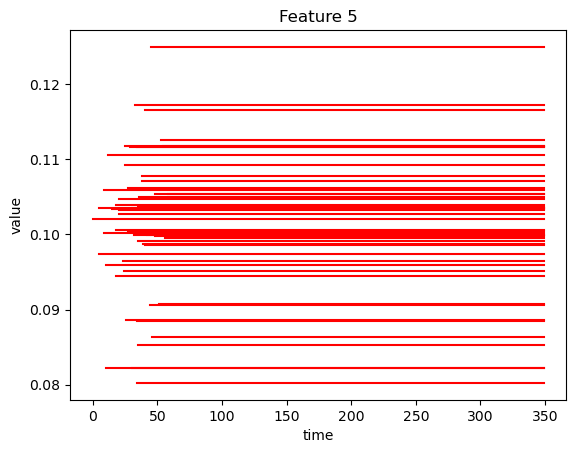

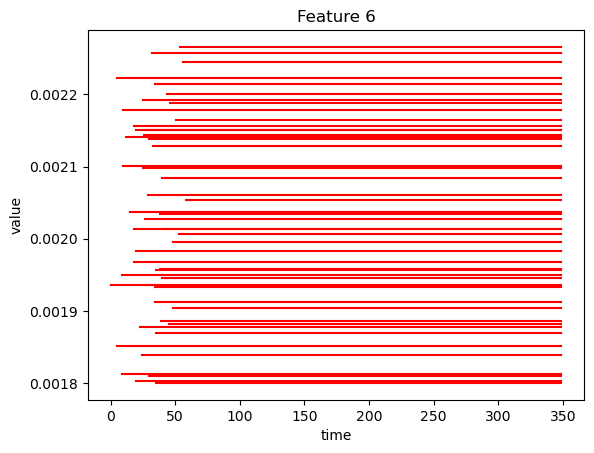

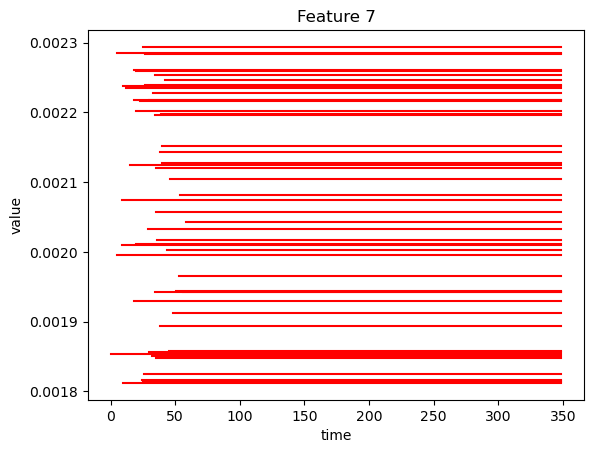

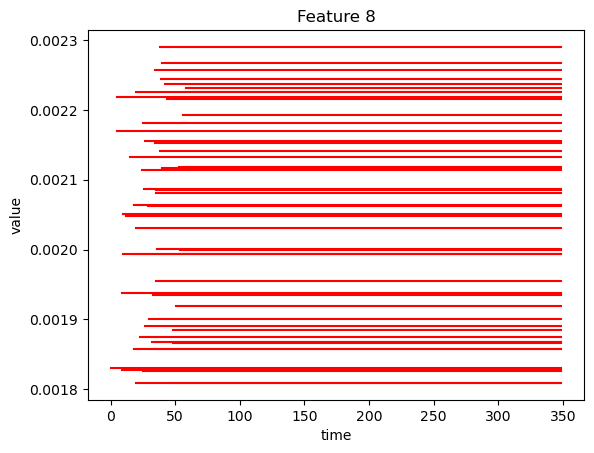

In [11]:
X_sep=sys_separation(X,sys_data)
plot_features(X_sep)


# Create Dataset

In [12]:
dataset=RULDataset(data=(X,Y),sys_array=sys_data)
dataset.cut_life(ini_life=100)
# Save the object to a file using pickle

/home/abeldg/.conda/envs/abel/lib/python3.11/site-packages/numpy/core/numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


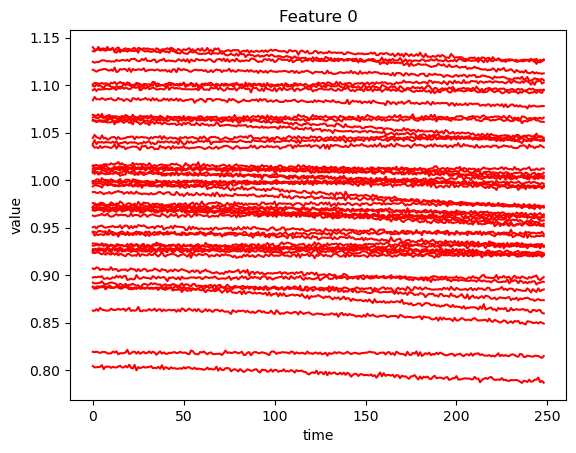

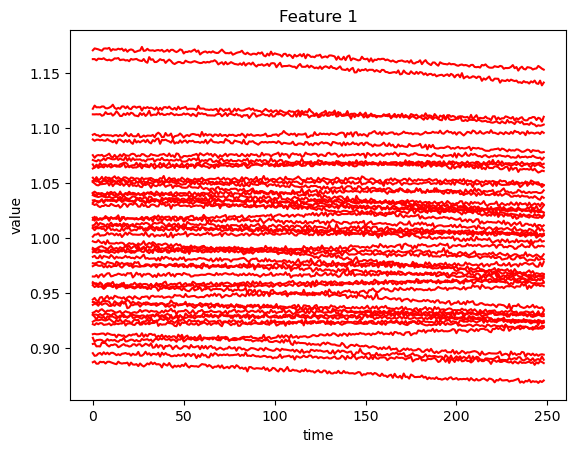

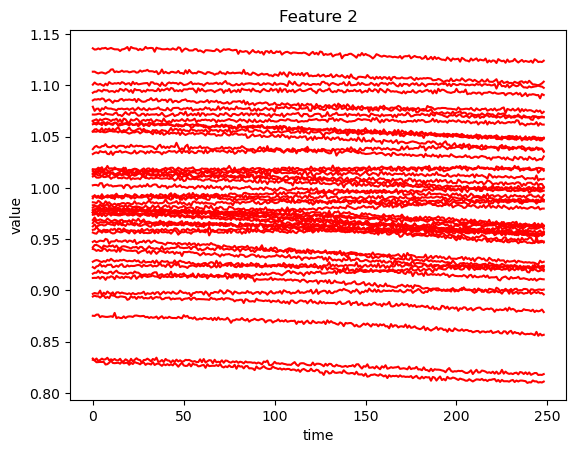

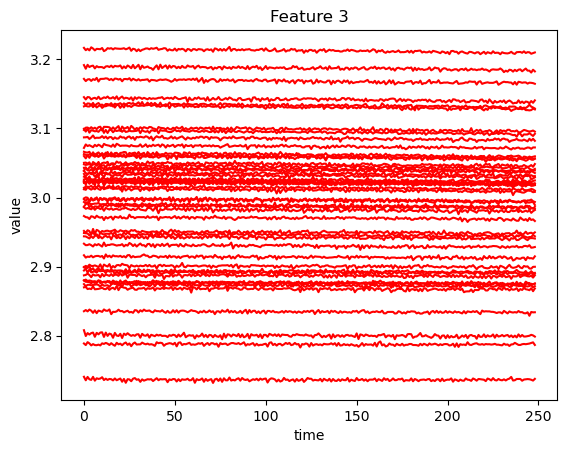

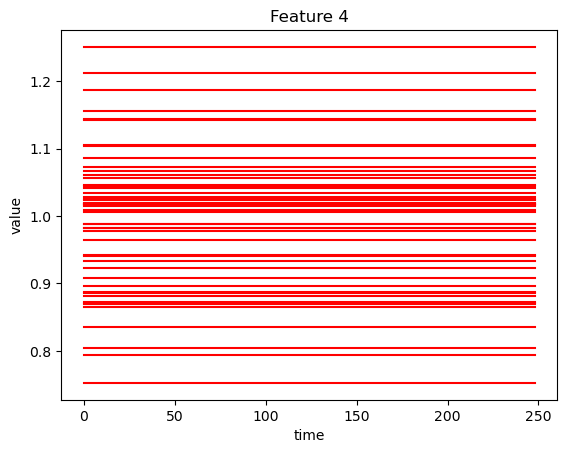

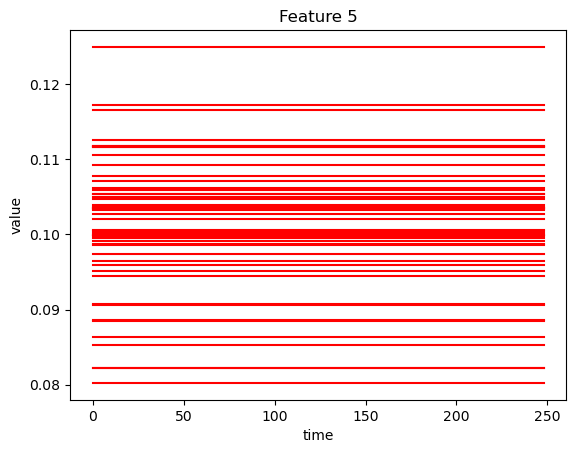

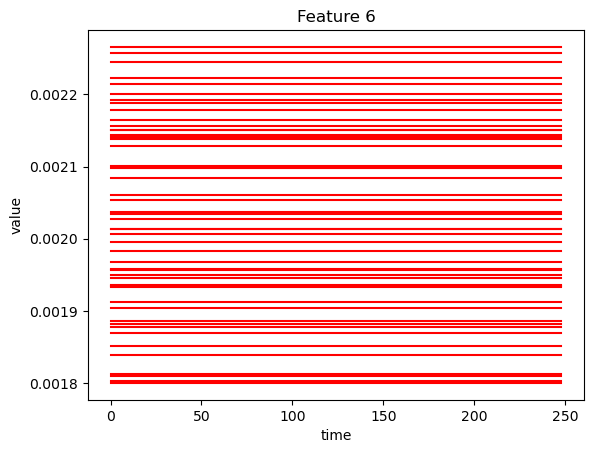

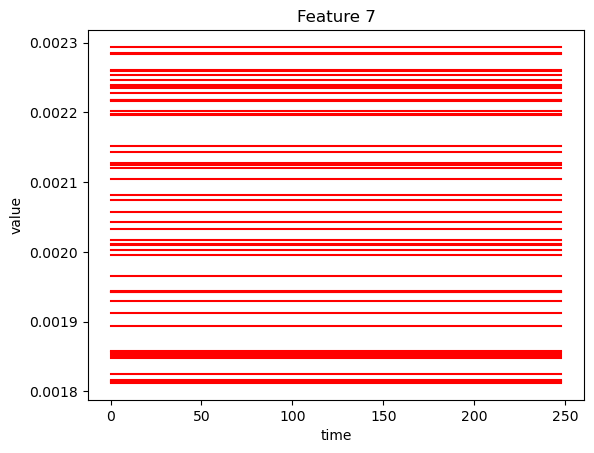

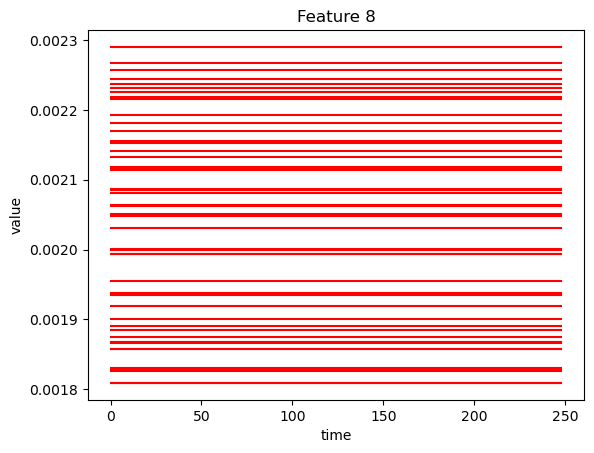

In [13]:
measurements,_,_=dataset.sys_separation()
plot_features(measurements)

### Reduce the number of systems (if neccesary)

In [14]:
reduce=False
if reduce:
    dataset=dataset.sub_collect(dataset.sys_set.intersection(range(1,reduce+1)))
    data=f'{data}_red{reduce}'
    import os
    os.makedirs(f'{data}', exist_ok=True)

# Save dataset

In [15]:
with open(f'./{data}/dataset{Test}.pkl', 'wb') as file:
    pickle.dump(dataset, file)

# Load DATASET

In [1]:
with open(f'./{data}/dataset{Test}.pkl', 'rb') as file:
    loaded_dataset = pickle.load(file)

NameError: name 'data' is not defined